# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.3.0'

# Data Import
#### Data about types of clothes(provided by the keras library)

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full) , (X_test, Y_test) = fashion_mnist.load_data()

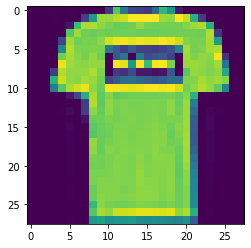

In [6]:
plt.imshow(X_train_full[1])

In [7]:
type(X_train_full)

numpy.ndarray

In [8]:
Y_train_full[0]

9

### Label	Description
#### 0	T-shirt/top
#### 1	Trouser
##### 2	Pullover
#### 3	Dress
#### 4	Coat
#### 5	Sandal
#### 6	Shirt
#### 7	Sneaker
#### 8	Bag
#### 9	Ankle boot

In [9]:
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

In [10]:
class_names[Y_train_full[1]]

'T-shirt/top'

In [11]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Data Normalization/Scaling
This procedure is done in order to make them at approximately same scale

In [12]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

# Splitting the data into train/validation/test datasets
##### Train Data : used for training the model
##### Validation Data : used for tuning the hyperparameters and evaluate the model
##### Test Data : used to test the model after it has gone through initial vetting by the validation set

In [13]:
X_valid, X_train = X_train_n[:5000] , X_train_n[5000:]
Y_valid, Y_train = Y_train_full[:5000] , Y_train_full[5000:]
X_test = X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

## Creating the ANN model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


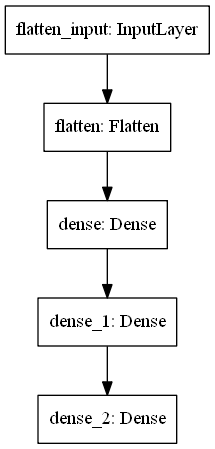

In [18]:
import pydot
keras.utils.plot_model(model)

In [20]:
weights , biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

# Compile and Train the Neural Network Model

In [25]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "sgd",metrics=[['accuracy']])

In [30]:
model_history = model.fit(X_train , Y_train , epochs = 30 , validation_data = (X_valid, Y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9521 - val_loss: 0.3577 - val_accuracy: 0.9044
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1085 - accuracy: 0.9574 - val_loss: 0.3617 - val_accuracy: 0.9054
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1033 - accuracy: 0.9592 - val_loss: 0.3637 - val_accuracy: 0.9042
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1002 - accuracy: 0.9604 - val_loss: 0.3655 - val_accuracy: 0.9042
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0978 - accuracy: 0.9614 - val_loss: 0.3675 - val_accuracy: 0.9056
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0960 - accuracy: 0.9625 - val_loss: 0.3700 - val_accuracy: 0.9072
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0944 - accuracy: 0.9629 - val_loss: 0.3751 - val_accuracy:

In [31]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
model_history.history

{'loss': [0.12447921931743622,
  0.10853953659534454,
  0.10330429673194885,
  0.100222647190094,
  0.09782704710960388,
  0.09602571278810501,
  0.0943588986992836,
  0.09295409172773361,
  0.09166529774665833,
  0.09057839214801788,
  0.0895199328660965,
  0.08841415494680405,
  0.08748302608728409,
  0.08655324578285217,
  0.08556239306926727,
  0.08480928093194962,
  0.0839957594871521,
  0.08313692361116409,
  0.08239345997571945,
  0.08173663914203644,
  0.0808425322175026,
  0.0801321268081665,
  0.07951711118221283,
  0.0787227600812912,
  0.07816475629806519,
  0.07746391743421555,
  0.07684744894504547,
  0.07625406235456467,
  0.07559319585561752,
  0.07508952170610428],
 'accuracy': [0.9521090984344482,
  0.9574000239372253,
  0.9592363834381104,
  0.960381805896759,
  0.96143639087677,
  0.9625454545021057,
  0.9628545641899109,
  0.9636726975440979,
  0.9641090631484985,
  0.9643272757530212,
  0.9647454619407654,
  0.9655091166496277,
  0.9655272960662842,
  0.9662545323

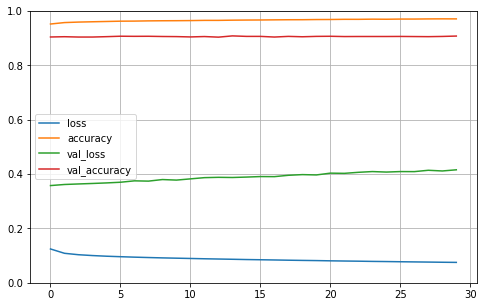

In [35]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Training the model

In [36]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.8990


[0.44575127959251404, 0.8989999890327454]

In [37]:
X_new = X_test[:3]

In [38]:
Y_proba = model.predict(X_new)
Y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
Y_pred = model.predict_classes(X_new)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[Y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


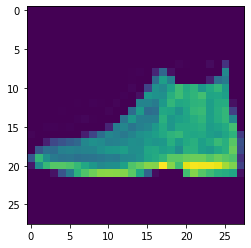

In [41]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


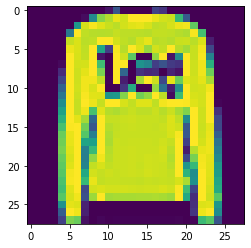

In [42]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


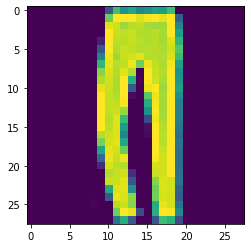

In [43]:
print(plt.imshow(X_test[2]))